In [2]:
import stat_arb
from stat_arb.model.data.simulated_data_handler import SimulatedDataHandler
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
import pandas as pd

plt.style.use("seaborn-v0_8")

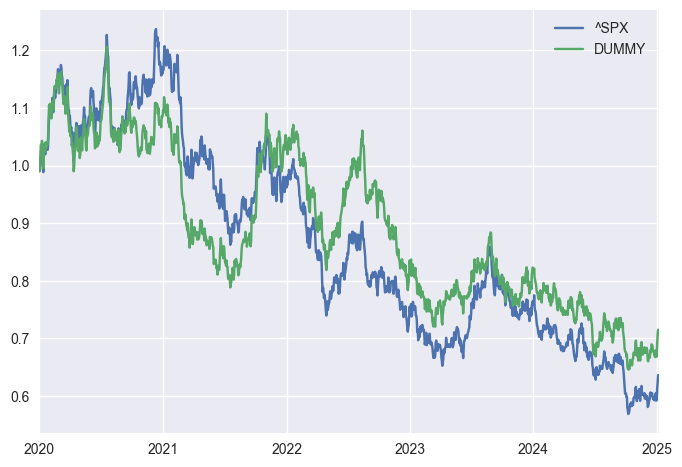

In [2]:
tickers = ["^SPX", "DUMMY"]
start = dt.date(2020, 1, 1)
end = dt.date(2025, 1, 8)
live = dt.date(2025, 1, 6)

data = SimulatedDataHandler(tickers, start, end, corr=0.9)

ts = data.get_normalised_close_prices()

ts.plot();

In [3]:
from statsmodels.regression.rolling import RollingOLS

ts = sm.add_constant(ts)

In [5]:
ts

,const,^SPX,DUMMY
2020-01-01,1.0,1.000000,1.000000
2020-01-02,1.0,1.001162,1.004764
2020-01-03,1.0,0.989335,0.994566
2020-01-06,1.0,1.003310,1.001785
2020-01-07,1.0,1.019527,1.014095
...,...,...,...
2025-01-02,1.0,0.580605,0.469111
2025-01-03,1.0,0.582452,0.472188
2025-01-06,1.0,0.568774,0.460385
2025-01-07,1.0,0.560583,0.453505


In [6]:
ols = RollingOLS(ts[["^SPX"]], ts[["const", "DUMMY"]], window=252)
ols = ols.fit()


<Axes: >

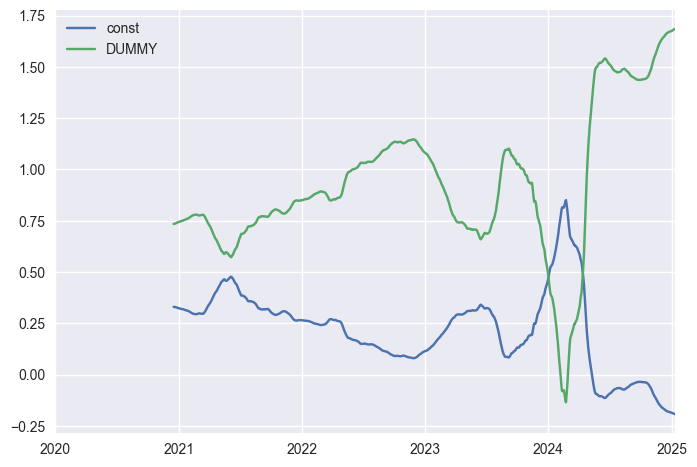

In [7]:
ols.params.plot()

C:\Users\wqwph\AppData\Local\Temp\ipykernel_11884\669648319.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(loc="upper right")


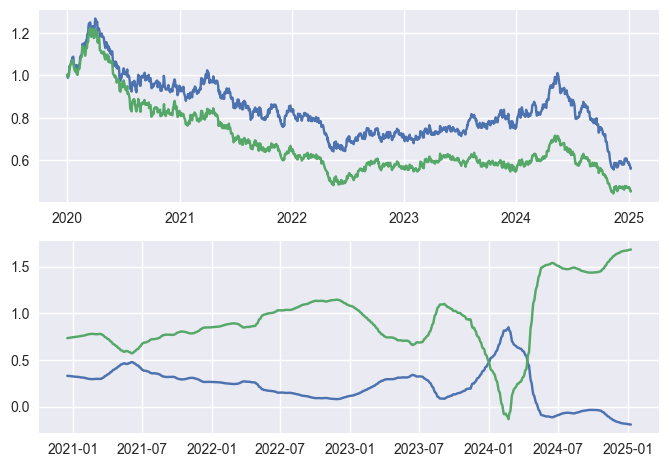

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].plot(ts[tickers])
ax[1].plot(ols.params)
ax[0].legend(loc="upper right")


In [9]:
regression = ols.params["const"] * ts["const"] + ols.params["DUMMY"] * ts["DUMMY"]

df =pd.concat((ts, regression), axis=1)
df.rename(columns={0:"Regression"}, inplace=True)
df["resids"] = df["^SPX"] - df["Regression"]
df


,const,^SPX,DUMMY,Regression,resids
2020-01-01,1.0,1.000000,1.000000,NaN,NaN
2020-01-02,1.0,1.001162,1.004764,NaN,NaN
2020-01-03,1.0,0.989335,0.994566,NaN,NaN
2020-01-06,1.0,1.003310,1.001785,NaN,NaN
2020-01-07,1.0,1.019527,1.014095,NaN,NaN
...,...,...,...,...,...
2025-01-02,1.0,0.580605,0.469111,0.599835,-0.019230
2025-01-03,1.0,0.582452,0.472188,0.604618,-0.022167
2025-01-06,1.0,0.568774,0.460385,0.584429,-0.015655
2025-01-07,1.0,0.560583,0.453505,0.572608,-0.012025


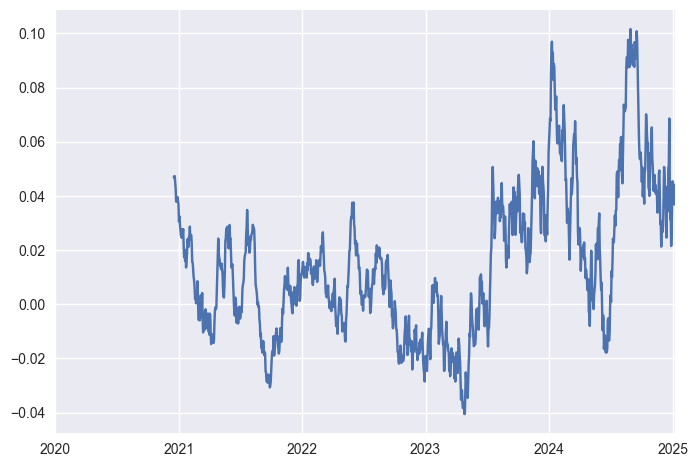

In [ ]:
df["resids"].plot();

In [ ]:
from statsmodels.tsa.stattools import coint

cadf = coint(ts["^SPX"], ts["DUMMY"], return_results=True)
cadf

(np.float64(-2.40045346287192),
 np.float64(0.3246402399419991),
 array([-3.90481977, -3.34079817, -3.04768914]))

In [15]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

ols = sm.OLS(ts["^SPX"], sm.add_constant(ts["DUMMY"]))
ols = ols.fit()
adfuller(ols.resid)

(np.float64(-2.3814938339794947),
 np.float64(0.1470279038749776),
 1,
 1309,
 {'1%': np.float64(-3.4353554773774553),
  '5%': np.float64(-2.86375051023515),
  '10%': np.float64(-2.5679468876340037)},
 np.float64(-9729.55315311973))

In [16]:
from stat_arb.model.bivariate_engle_granger import BivariateEngleGranger
from stat_arb.model.data.data_handler_enum import DataHandlerEnum
import plotly.express as px

ticker_a = "^SPX"
ticker_b = "AMZN"
start = dt.date(2020, 1, 1)
end = dt.date(2025, 1, 8)
live = dt.date(2025, 1, 6)
source = DataHandlerEnum.SIMULATED
model = BivariateEngleGranger(ticker_a, ticker_b, start, end, live, source)
ts = model.get_data()
px.line(ts)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=^SPX<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '^SPX',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '^SPX',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
                          '2020-01-03T00:00:00.000000000', ..., '2025-01-06T00:00:00.000000000',
                          '2025-01-07T00:00:00.000000000', '2025-01-08T00:00:00.000000000'],
                         shape=(1311,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAWUCmyPlhwQJZQD5urzjA0l' ... 'HPjeoOXkDQWJsfwD9eQPEP06v2eF5A'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=AMZN<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'AMZN',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'AMZN',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
                          '2020-01-03T00:00:00.000000000', ..., '2025-01-06T00:00:00.000000000',
                          '2025-01-07T00:00:00.000000000', '2025-01-08T00:00:00.000000000'],
                         shape=(1311,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAWUCus2sN9ftYQNXDHd8LF1' ... 'YPqEjPV0A7wDoMzrRXQLdeYBAoMVhA'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

<Axes: >

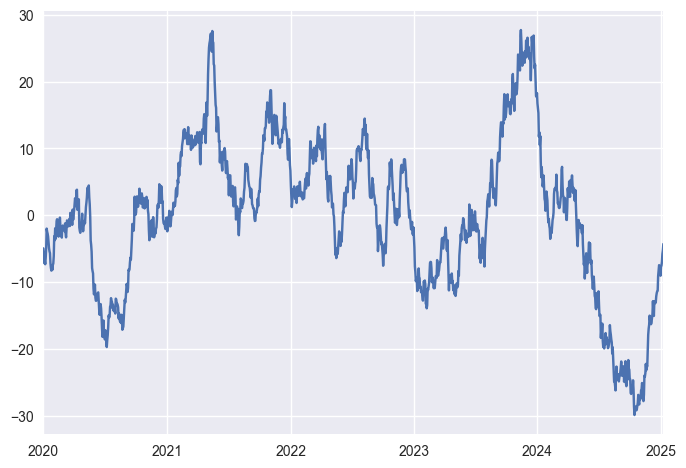

In [17]:
model.get_data()

model.get_residual().plot()

In [1]:
import pandas as pd

link = r"https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

wiki = pd.read_html(link)

In [ ]:
wiki[0]["Symbol"].to_csv("tickers_20250418.csv", index=False)